In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker = "^NSEI"
start_date = "2022-01-01"
end_date = "2024-12-31"
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2022-01-03  17625.699219  17646.650391  17383.300781  17387.150391  200500   
2022-01-04  17805.250000  17827.599609  17593.550781  17681.400391  247400   
2022-01-05  17925.250000  17944.699219  17748.849609  17820.099609  251500   
2022-01-06  17745.900391  17797.949219  17655.550781  17768.500000  236500   
2022-01-07  17812.699219  17905.000000  17704.550781  17797.599609  239300   
...                  ...           ...           ...           ...     ...   
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800   
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700   
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700   
2024-12-27  23813.400391  23938.849609  23800.599609  23801.4003

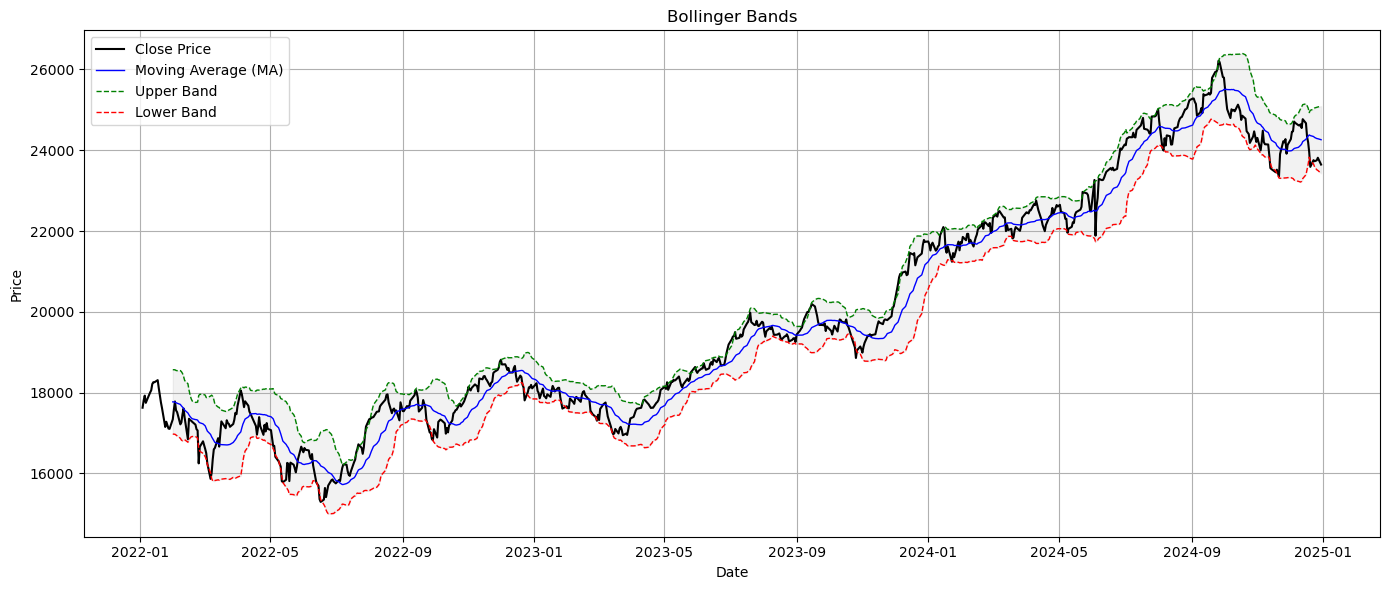

In [32]:
# CALCULATING THE TECHNICAL INDICATORS

# Bollinger Bands

def calculate_bollinger_bands(df, window=20, num_std=2):
   
    df['MA'] = df['Close'].rolling(window=window).mean()
    df['STD'] = df['Close'].rolling(window=window).std()
    df['Upper Band'] = df['MA'] + (df['STD'] * num_std)
    df['Lower Band'] = df['MA'] - (df['STD'] * num_std)
    return df

print(calculate_bollinger_bands(data))

def plot_bollinger_bands(df, title='Bollinger Bands'):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1.5)
    plt.plot(df.index, df['MA'], label='Moving Average (MA)', color='blue', linewidth=1)
    plt.plot(df.index, df['Upper Band'], label='Upper Band', color='green', linestyle='--', linewidth=1)
    plt.plot(df.index, df['Lower Band'], label='Lower Band', color='red', linestyle='--', linewidth=1)
    plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='gray', alpha=0.1)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_bollinger_bands(data)

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2022-01-03  17625.699219  17646.650391  17383.300781  17387.150391  200500   
2022-01-04  17805.250000  17827.599609  17593.550781  17681.400391  247400   
2022-01-05  17925.250000  17944.699219  17748.849609  17820.099609  251500   
2022-01-06  17745.900391  17797.949219  17655.550781  17768.500000  236500   
2022-01-07  17812.699219  17905.000000  17704.550781  17797.599609  239300   
...                  ...           ...           ...           ...     ...   
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800   
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700   
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700   
2024-12-27  23813.400391  23938.849609  23800.599609  23801.4003

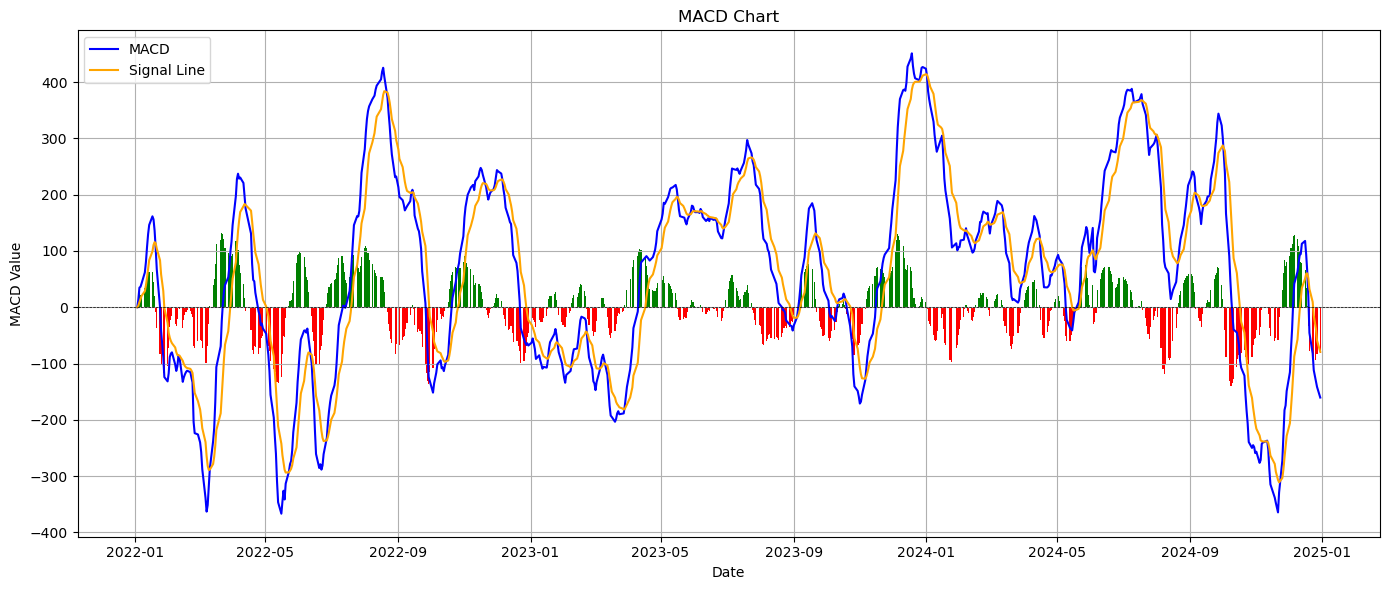

In [34]:
# MACD

def calculate_macd(df, fast=12, slow=26, signal=9):
    df['EMA_Fast'] = df['Close'].ewm(span=fast, adjust=False).mean()
    df['EMA_Slow'] = df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD'] = df['EMA_Fast'] - df['EMA_Slow']
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['Signal']
    return df

print(calculate_macd(data))

def plot_macd(df, title='MACD Chart'):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue', linewidth=1.5)
    plt.plot(df.index, df['Signal'], label='Signal Line', color='orange', linewidth=1.5)
    hist_colors = ['green' if val >= 0 else 'red' for val in df['MACD_Hist']]
    plt.bar(df.index, df['MACD_Hist'], color=hist_colors, width=1) 
    # the colour is green when the value of macd-signal is positive indicating a bullish movement 
    # and the colour is red when the value of macd-signal is negative indicatng a bearish movement
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_macd(data)

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2022-01-03  17625.699219  17646.650391  17383.300781  17387.150391  200500   
2022-01-04  17805.250000  17827.599609  17593.550781  17681.400391  247400   
2022-01-05  17925.250000  17944.699219  17748.849609  17820.099609  251500   
2022-01-06  17745.900391  17797.949219  17655.550781  17768.500000  236500   
2022-01-07  17812.699219  17905.000000  17704.550781  17797.599609  239300   
...                  ...           ...           ...           ...     ...   
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800   
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700   
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700   
2024-12-27  23813.400391  23938.849609  23800.599609  23801.4003

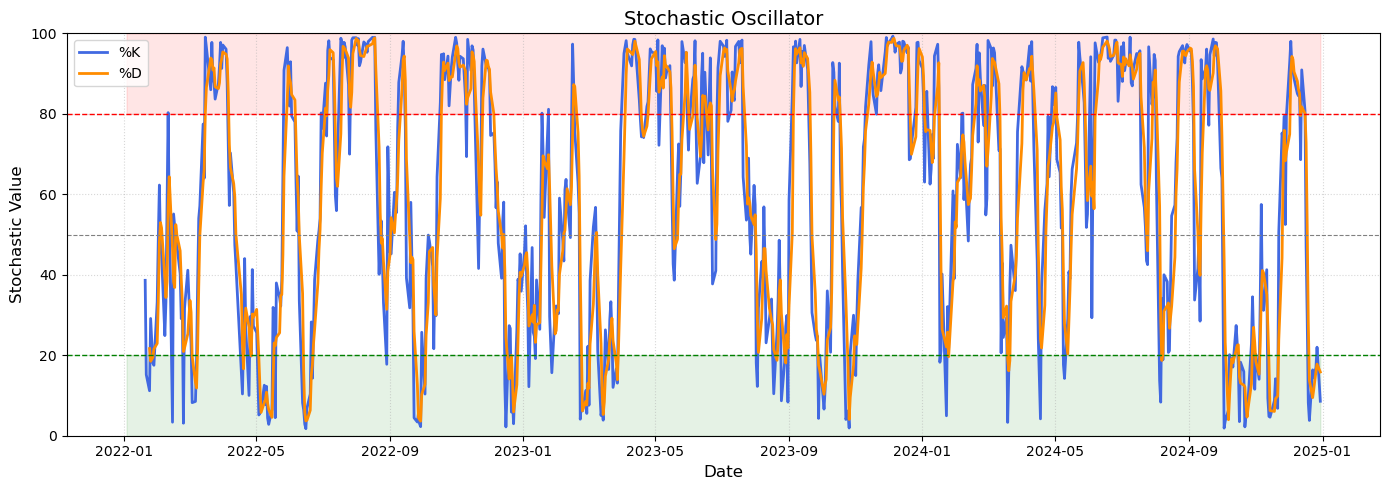

In [36]:
# Stochastic oscillator

def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window).min()
    high_max = df['High'].rolling(window=k_window).max()
    df['%K'] = 100 * ((df['Close'] - low_min) / (high_max - low_min))
    df['%D'] = df['%K'].rolling(window=d_window).mean()
    return df

print(calculate_stochastic_oscillator(data))

def plot_stochastic_oscillator(df, title='Stochastic Oscillator'):
    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['%K'], label='%K', color='royalblue', linewidth=2)
    plt.plot(df.index, df['%D'], label='%D', color='darkorange', linewidth=2)
    plt.fill_between(df.index, 80, 100, color='red', alpha=0.1)
    plt.fill_between(df.index, 0, 20, color='green', alpha=0.1)
    plt.axhline(80, color='red', linestyle='--', linewidth=1)
    plt.axhline(20, color='green', linestyle='--', linewidth=1)
    plt.axhline(50, color='gray', linestyle='--', linewidth=0.8)
    plt.title(title, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stochastic Value', fontsize=12)
    plt.ylim(0, 100)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_stochastic_oscillator(data)

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2022-01-03  17625.699219  17646.650391  17383.300781  17387.150391  200500   
2022-01-04  17805.250000  17827.599609  17593.550781  17681.400391  247400   
2022-01-05  17925.250000  17944.699219  17748.849609  17820.099609  251500   
2022-01-06  17745.900391  17797.949219  17655.550781  17768.500000  236500   
2022-01-07  17812.699219  17905.000000  17704.550781  17797.599609  239300   
...                  ...           ...           ...           ...     ...   
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800   
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700   
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700   
2024-12-27  23813.400391  23938.849609  23800.599609  23801.4003

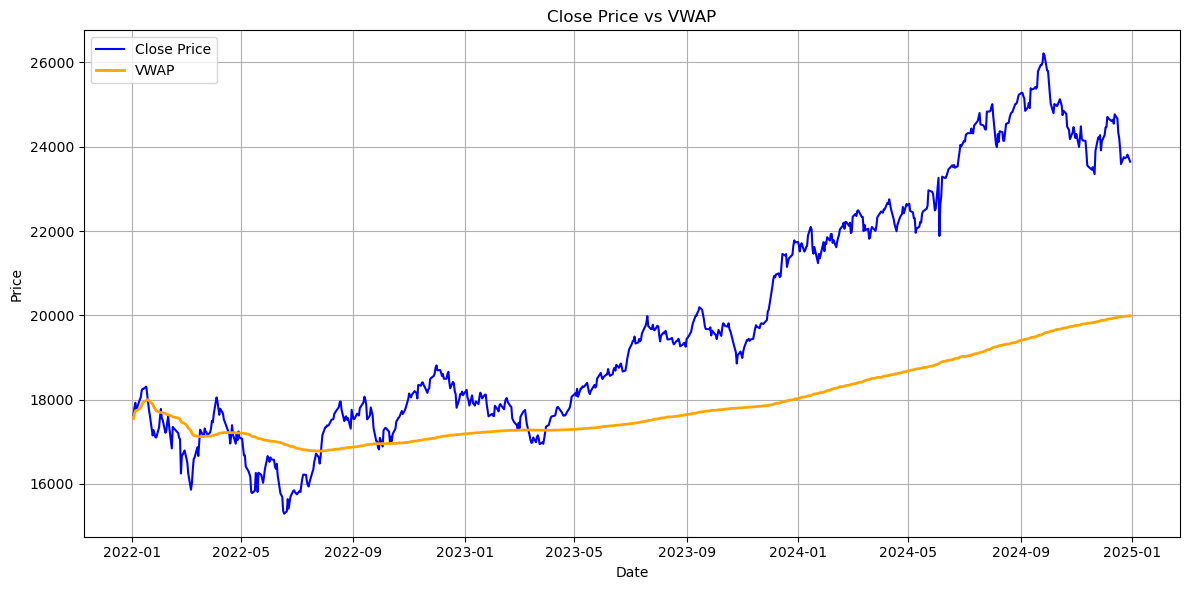

In [38]:
# VWAP

def calculate_vwap(df):
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    cumulative_tpv = (typical_price * df['Volume']).cumsum()
    cumulative_vol = df['Volume'].cumsum()
    df['VWAP'] = cumulative_tpv / cumulative_vol
    return df

print(calculate_vwap(data))

def plot_vwap(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue', linewidth=1.5)
    plt.plot(df.index, df['VWAP'], label='VWAP', color='orange', linewidth=2)
    plt.title('Close Price vs VWAP')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_vwap(data)

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2022-01-03  17625.699219  17646.650391  17383.300781  17387.150391  200500   
2022-01-04  17805.250000  17827.599609  17593.550781  17681.400391  247400   
2022-01-05  17925.250000  17944.699219  17748.849609  17820.099609  251500   
2022-01-06  17745.900391  17797.949219  17655.550781  17768.500000  236500   
2022-01-07  17812.699219  17905.000000  17704.550781  17797.599609  239300   
...                  ...           ...           ...           ...     ...   
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800   
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700   
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700   
2024-12-27  23813.400391  23938.849609  23800.599609  23801.4003

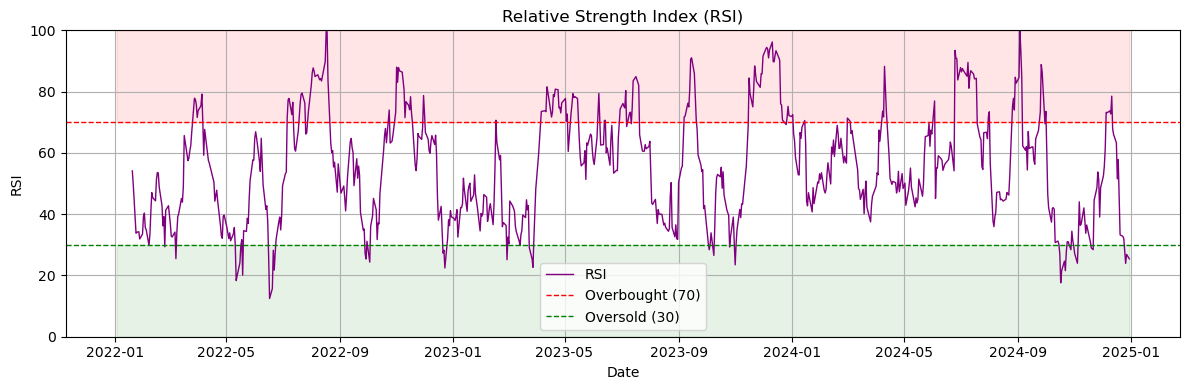

In [40]:
# RSI

def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

print(calculate_rsi(data))

def plot_rsi(df):
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['RSI'], label='RSI', color='purple', linewidth=1)
    plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
    plt.fill_between(df.index, 70, 100, color='red', alpha=0.1)
    plt.fill_between(df.index, 0, 30, color='green', alpha=0.1)
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_rsi(data)

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2022-01-03  17625.699219  17646.650391  17383.300781  17387.150391  200500   
2022-01-04  17805.250000  17827.599609  17593.550781  17681.400391  247400   
2022-01-05  17925.250000  17944.699219  17748.849609  17820.099609  251500   
2022-01-06  17745.900391  17797.949219  17655.550781  17768.500000  236500   
2022-01-07  17812.699219  17905.000000  17704.550781  17797.599609  239300   
...                  ...           ...           ...           ...     ...   
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800   
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700   
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700   
2024-12-27  23813.400391  23938.849609  23800.599609  23801.4003

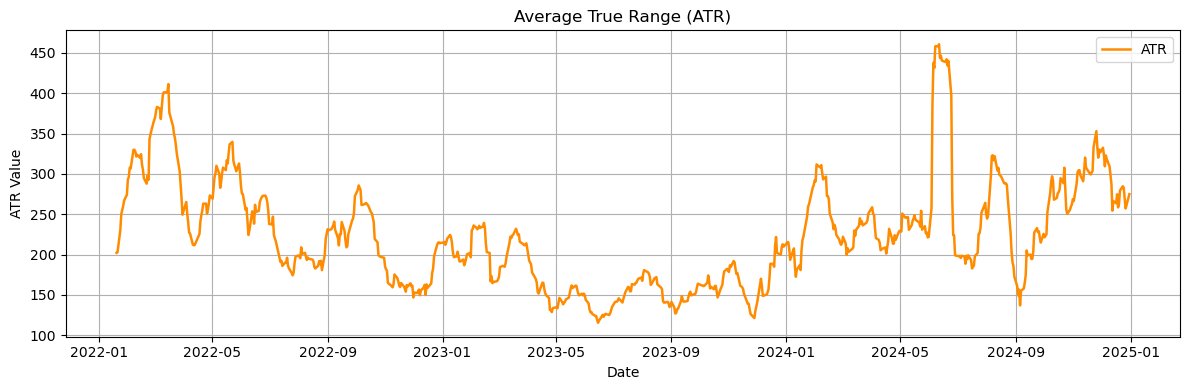

In [42]:
# ATR

def calculate_atr(df, window=14):
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    df['ATR'] = df['TR'].rolling(window=window).mean()
    df.drop(['H-L', 'H-PC', 'L-PC', 'TR'], axis=1, inplace=True)
    return df

print(calculate_atr(data))

def plot_atr(df):
    plt.figure(figsize=(12, 4))  
    plt.plot(df.index, df['ATR'], label='ATR', color='darkorange', linewidth=1.8) 
    plt.title('Average True Range (ATR)')
    plt.xlabel('Date')
    plt.ylabel('ATR Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_atr(data)

In [62]:
# SIGNAL GENERATION

def generate_bollinger_signal(df):
    df['Boll_Buy'] = np.where((df['Close'] < df['Lower Band']) & (df['Close'].shift(1) >= df['Lower Band'].shift(1)),1,0) # Buy when price crosses below Lower Band
    df['Boll_Sell'] = np.where((df['Close'] > df['Upper Band']) & (df['Close'].shift(1) <= df['Upper Band'].shift(1)),1,0)  # Sell when price crosses above Upper Band
    total_buy_signal = df['Boll_Buy'].sum()
    total_sell_signal = df['Boll_Sell'].sum()
    print("Total Buy signals in Bollinger Bands = " + str(total_buy_signal))
    print("Total Sell signals in Bollinger Bands = " + str(total_sell_signal))
    return df  


def generate_macd_signal(df):
    df['MACD_Buy'] = np.where( (df['MACD'].shift(1) < df['Signal'].shift(1)) & (df['MACD'] > df['Signal']), 1, 0)  # Buy when MACD crosses above Signal line
    df['MACD_Sell'] = np.where( (df['MACD'].shift(1) > df['Signal'].shift(1)) & (df['MACD'] < df['Signal']), 1, 0)  # Sell when MACD crosses below Signal line
    total_buy_signal_2=df['MACD_Buy'].sum()
    total_sell_signal_2=df['MACD_Sell'].sum()
    print("Total Buy signals in MACD= " + str(total_buy_signal_2))
    print("Total Sell signals in MACD= " + str(total_sell_signal_2))
    return df


def generate_stochastic_signal(df):
    df['Stochastic_Buy'] = np.where((df['%K'] > df['%D']) & (df['%K'] < 20) & (df['%K'].shift(1) <= df['%D'].shift(1)), 1, 0)  # Buy when %K crosses %D and %K < 20
    df['Stochastic_Sell'] = np.where((df['%K'] < df['%D']) & (df['%K'] > 80) & (df['%K'].shift(1) >= df['%D'].shift(1)), 1, 0)  # Sell when %K crosses %D and %K > 80
    total_buy_signal_3=df['Stochastic_Buy'].sum()
    total_sell_signal_3=df['Stochastic_Sell'].sum()
    print("Total Buy signals in Stochastic= " + str(total_buy_signal_3))
    print("Total Sell signals in Stochastic= " + str(total_sell_signal_3))
    return df


def generate_rsi_signal(df):
    df['RSI_Buy'] = np.where((df['RSI'] < 30) & (df['RSI'].shift(1) >= 30), 1, 0)  # Buy when RSI crosses above 30
    df['RSI_Sell'] = np.where((df['RSI'] > 70) & (df['RSI'].shift(1) <= 70), 1, 0)  # Sell when RSI crosses below 70
    total_buy_signal_4=df['RSI_Buy'].sum()
    total_sell_signal_4=df['RSI_Sell'].sum()
    print("Total Buy signals in RSI= " + str(total_buy_signal_4))
    print("Total Sell signals in RSI= " + str(total_sell_signal_4))
    return df


def generate_vwap_signal(df):
    df['VWAP_Buy'] = np.where((df['Close'].shift(1) <= df['VWAP'].shift(1)) & (df['Close'] > df['VWAP']),1,0)  
    df['VWAP_Sell'] = np.where((df['Close'].shift(1) >= df['VWAP'].shift(1)) & (df['Close'] < df['VWAP']),1,0)  
    total_buy_signal = df['VWAP_Buy'].sum()
    total_sell_signal = df['VWAP_Sell'].sum()
    print("Total Buy signals in VWAP = " + str(total_buy_signal))
    print("Total Sell signals in VWAP = " + str(total_sell_signal))
    return df


def generate_atr_signal(df, threshold=1.5):
    mean_atr = df['ATR'].mean()
    df['ATR_Buy'] = np.where(df['ATR'] > (threshold * mean_atr),1,0)
    df['ATR_Sell'] = np.where(df['ATR'] < (mean_atr / threshold),1,0)
    total_buy_signal_6=df['ATR_Buy'].sum()
    total_sell_signal_6=df['ATR_Sell'].sum()
    print("Total Buy signals in ATR= " + str(total_buy_signal_6))
    print("Total Sell signals in ATR= " + str(total_sell_signal_6))
    return df


#generate_bollinger_signal(data)  #was getting an error while running this funciton 
# ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.
generate_macd_signal(data)
generate_stochastic_signal(data)
generate_rsi_signal(data)
#generate_vwap_signal(data) #was getting the same error for this function too.
generate_atr_signal(data)


Total Buy signals in MACD= 27
Total Sell signals in MACD= 28
Total Buy signals in Stochastic= 13
Total Sell signals in Stochastic= 56
Total Buy signals in RSI= 21
Total Sell signals in RSI= 28
Total Buy signals in ATR= 36
Total Sell signals in ATR= 74


Price,Close,High,Low,Open,Volume,MA,STD,Upper Band,Lower Band,EMA_Fast,...,RSI,ATR,MACD_Buy,MACD_Sell,Stochastic_Buy,Stochastic_Sell,RSI_Buy,RSI_Sell,ATR_Buy,ATR_Sell
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,17625.699219,17646.650391,17383.300781,17387.150391,200500,NaN,NaN,NaN,NaN,17625.699219,...,NaN,NaN,0,0,0,0,0,0,0,0
2022-01-04,17805.250000,17827.599609,17593.550781,17681.400391,247400,NaN,NaN,NaN,NaN,17653.322416,...,NaN,NaN,0,0,0,0,0,0,0,0
2022-01-05,17925.250000,17944.699219,17748.849609,17820.099609,251500,NaN,NaN,NaN,NaN,17695.157429,...,NaN,NaN,0,0,0,0,0,0,0,0
2022-01-06,17745.900391,17797.949219,17655.550781,17768.500000,236500,NaN,NaN,NaN,NaN,17702.964038,...,NaN,NaN,0,0,0,0,0,0,0,0
2022-01-07,17812.699219,17905.000000,17704.550781,17797.599609,239300,NaN,NaN,NaN,NaN,17719.846374,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,23753.449219,23869.550781,23647.199219,23738.199219,189800,24339.255078,339.650109,25018.555295,23659.954861,24176.453206,...,32.759206,284.742885,0,0,1,0,0,0,0,0
2024-12-24,23727.650391,23867.650391,23685.150391,23769.099609,177700,24315.912598,365.202940,25046.318478,23585.506717,24107.406619,...,32.011432,283.000140,0,0,0,0,0,0,0,0
